<a href="https://colab.research.google.com/github/rezamohammadloo/cats-dogs-classifier-using-cnn/blob/main/CatsvsDogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#getting data
!wget --no-check-certificate https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

In [11]:
#unzipping data
import zipfile

zip_file=zipfile.ZipFile("/content/cats_and_dogs_filtered.zip", 'r')
zip_file.extractall()

zip_file.close()

In [ ]:
import os
print('total training cat images :', len(os.listdir( "/content/cats_and_dogs_filtered/train/cats") ))
print('total training dog images :', len(os.listdir("/content/cats_and_dogs_filtered/train/dogs") ))

print('total validation cat images :', len(os.listdir("/content/cats_and_dogs_filtered/validation/cats") ))
print('total validation dog images :', len(os.listdir( "/content/cats_and_dogs_filtered/validation/dogs") ))

In [ ]:
#using image data generator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

train_generator = train_datagen.flow_from_directory("/content/cats_and_dogs_filtered/train",
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150, 150))

validation_generator =  test_datagen.flow_from_directory("/content/cats_and_dogs_filtered/validation",
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))

In [15]:
#building our CNN
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),

    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [17]:
#compiling net with RMSprop and binary crossentropy
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics = ['accuracy'])

In [ ]:
history = model.fit(
            train_generator,
            epochs=15,
            validation_data=validation_generator,
            verbose=2
            )

Text(0.5, 1.0, 'Training and validation loss')

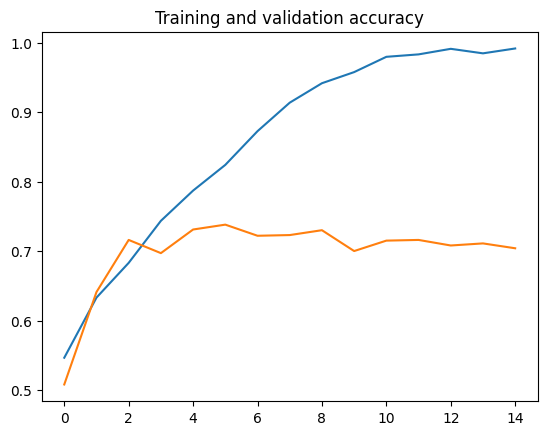

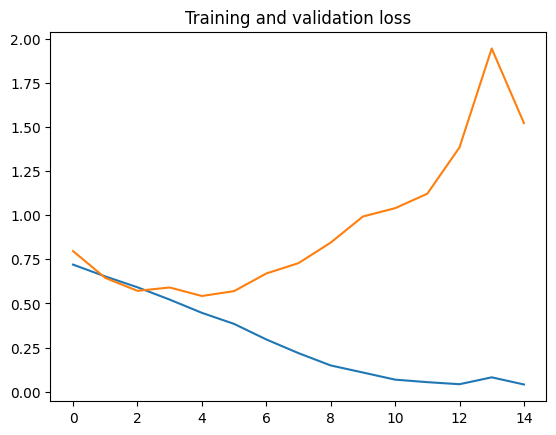

In [19]:
import matplotlib.pyplot as plt

acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Getting the number of epochs

plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )

obviously we have overfitting problem!